In [1]:
from base64 import b64encode

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation
from qutip import (about, basis, coherent, destroy, displace, expect, mesolve,
                   num, plot_wigner_fock_distribution, squeeze, variance)

%matplotlib inline

In [2]:
#PARAMETER 

N = 35
w = 2 * np.pi  
tlist = np.linspace(0, 2, 31)

In [3]:
# operators

a = destroy(N)
n = num(N)
x = (a + a.dag()) / np.sqrt(2)
p = -1j * (a - a.dag()) / np.sqrt(2)

In [4]:
# the quantum harmonic oscillator Hamiltonian
H = w * a.dag() * a

In [5]:
c_ops = []

In [6]:
def plot_expect_with_variance(N, op_list, op_title, states):

    fig, ax = plt.subplots(1, len(op_list), figsize=(14, 3))

    for idx, op in enumerate(op_list):

        e_op = expect(op, states)
        v_op = variance(op, states)

        ax[idx].fill_between(
            tlist, e_op - np.sqrt(v_op), e_op + np.sqrt(v_op), color="red", alpha=0.5)
        ax[idx].plot(tlist, e_op, label="expectation")
        ax[idx].set_xlabel("Time")
        ax[idx].set_title(op_title[idx])

    return fig, ax

In [7]:
def display_embedded_video(filename):
    video = open(filename, "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls alt="test" \
                src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
    return HTML(video_tag)

In [8]:
# COHERENT STATE

psi0 = coherent(N, 2.0)

In [9]:
result = mesolve(H, psi0, tlist, c_ops, [])

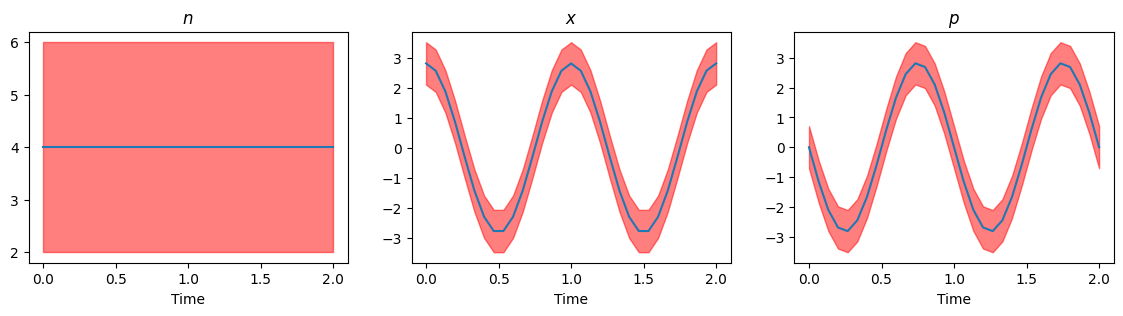

In [10]:
plot_expect_with_variance(N, [n, x, p], [r"$n$", r"$x$", r"$p$"], result.states);

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


def update(n):
    ax[0].cla()
    plot_wigner_fock_distribution(result.states[n], fig=fig, axes=ax)
    return ax[0].artists + ax[1].artists


anim = animation.FuncAnimation(fig, update, frames=len(result.states), blit=True)

anim.save("./L9/animation-coherent-state.mp4", fps=10, writer="ffmpeg")

plt.close(fig)

In [12]:
# SQUEEZED VACUMM

psi0 = squeeze(N, 1.0) * basis(N, 0)

In [13]:
result = mesolve(H, psi0, tlist, c_ops, [])

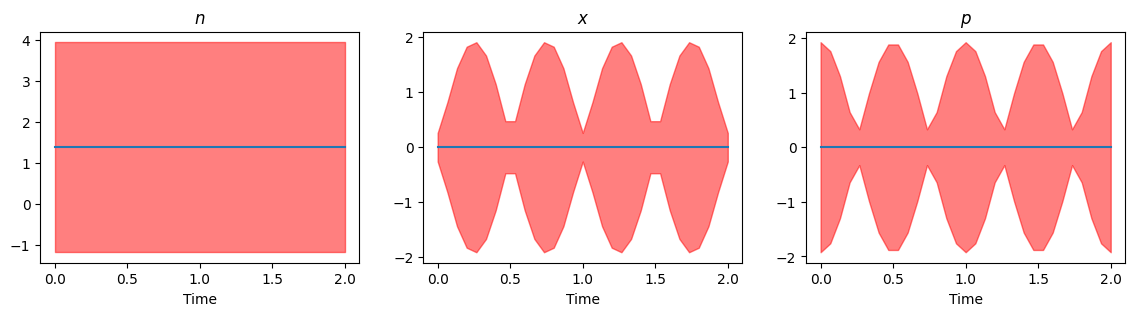

In [14]:
plot_expect_with_variance(N, [n, x, p], [r"$n$", r"$x$", r"$p$"], result.states);

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(n):
    ax[0].cla()
    plot_wigner_fock_distribution(result.states[n], fig=fig, axes=ax)
    return ax[0].artists + ax[1].artists

anim = animation.FuncAnimation(fig, update, frames=len(result.states), blit=True)

anim.save("./L9/animation-squeezed-vacuum.mp4", fps=10, writer="ffmpeg")

plt.close(fig)

In [16]:
display_embedded_video("/tmp/animation-coherent-state.mp4")

In [17]:
# SQUEEZED COHERENT STATE

psi0 = (displace(N, 2.0) * squeeze(N, 1.0) * basis(N, 0)) 

In [18]:
result = mesolve(H, psi0, tlist, c_ops, [])

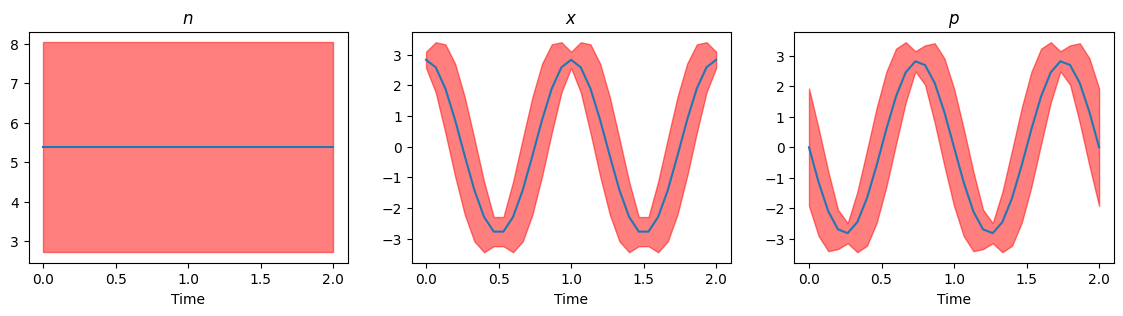

In [19]:
plot_expect_with_variance(N, [n, x, p], [r"$n$", r"$x$", r"$p$"], result.states);

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(n):
    ax[0].cla()
    plot_wigner_fock_distribution(result.states[n], fig=fig, axes=ax)
    return ax[0].artists + ax[1].artists

anim = animation.FuncAnimation(fig, update, frames=len(result.states), blit=True)

anim.save("./L9/animation-squeezed-coherent-state.mp4", fps=10, writer="ffmpeg")

plt.close(fig)

In [21]:
display_embedded_video("./L9/animation-squeezed-vacuum.mp4")